<a href="https://colab.research.google.com/github/Jeet1309/AI-ML-tss/blob/main/ImagePreprocessing_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RUN ALL THE CELLS AND DON'T EDIT ANY CELL**

**CODE IN THE MENTIONED CELLS ONLY**

## Import Necessary Files

In [112]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


Add ```/path/to/your/folder``` to load the images

In [113]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [114]:
cartoon = cv2.imread("/content/drive/MyDrive/opencv assignment/week1/cartoon.bmp")
cartoon_y = cv2.imread("/content/drive/MyDrive/opencv assignment/week1/cartoon_y.jpg")
girl = cv2.imread("/content/drive/MyDrive/opencv assignment/week1/girl.png") #grayscale image
girl_y = cv2.imread("/content/drive/MyDrive/opencv assignment/week1/girl_y.jpg")
fingerprint = cv2.imread("/content/drive/MyDrive/opencv assignment/week1/fingerprint.jpg")
fingerprint_y = cv2.imread("/content/drive/MyDrive/opencv assignment/week1/fingerprint_y.jpg")

## Raw and Final Image
You need to process the raw images: ```cartoon, girl, fingerprint``` to get the processed images: ```cartoon_y, girl_y, fingerprint_y```

Your processed image need not be 100% alike given processed image. They are given to give you an idea of what to process in the raw images.

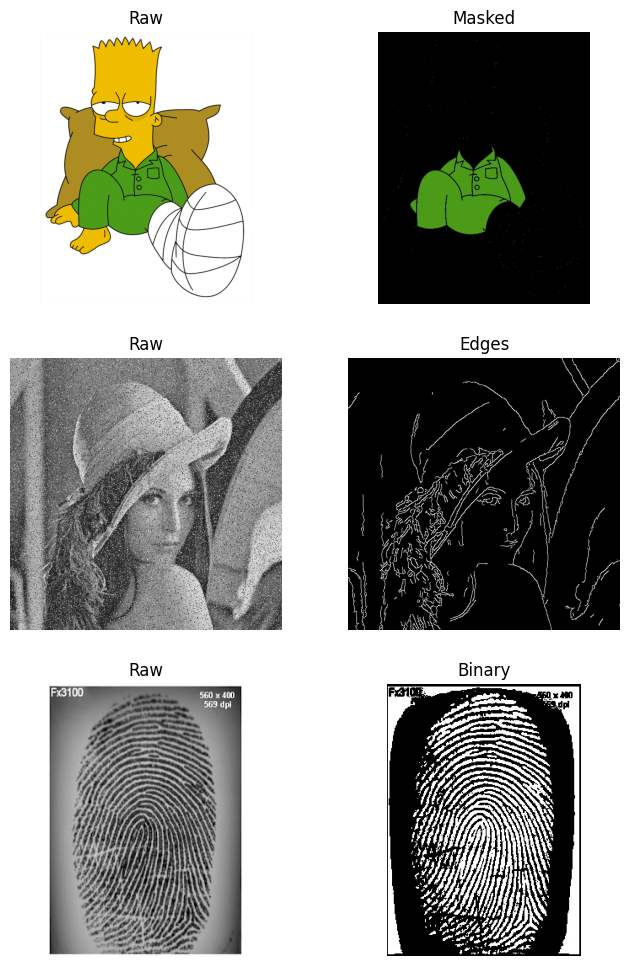

In [115]:
fig, axs = plt.subplots(3,2,figsize=(8,12))
axs[0,0].imshow(cv2.cvtColor(cartoon,cv2.COLOR_BGR2RGB))
axs[0,1].imshow(cartoon_y)
axs[0,0].axis("off")
axs[0,1].axis("off")
axs[0,0].set_title("Raw")
axs[0,1].set_title("Masked")
axs[1,0].imshow(girl)
axs[1,1].imshow(girl_y)
axs[1,0].axis("off")
axs[1,1].axis("off")
axs[1,0].set_title("Raw")
axs[1,1].set_title("Edges")
axs[2,0].imshow(cv2.cvtColor(fingerprint,cv2.COLOR_BGR2RGB))
axs[2,1].imshow(fingerprint_y)
axs[2,0].axis("off")
axs[2,1].axis("off")
axs[2,0].set_title("Raw")
axs[2,1].set_title("Binary")
plt.show()

## Code in the following 3 cells only

### Cartoon
For the bart image, you need to mask the dress. Write all your code in the cell below and the final image should be stored in ```cartoon_y_mentee``` variable only or it'll show error later.

In [116]:
#START CODE HERE (Do all your processing here)

lower_green = np.array([35, 100, 100])
upper_green = np.array([50, 255, 255])
hsv_img = cv2.cvtColor(cartoon,cv2.COLOR_BGR2HSV)

cartoon_y_mentee = cartoon.copy()
mask= cv2.inRange(hsv_img, lower_green, upper_green)
cartoon_y_mentee = cv2.bitwise_and(cartoon, cartoon, mask=mask)

#END CODE HERE (the final processed image should be cartoon_y_mentee)

### Girl
For the girl image, you need to detect the edges. Write all your code in the cell below and the final image should be stored in ```girl_y_mentee``` variable only or it'll show error later.

In [117]:
#START CODE HERE (Do all your processing here)

gray = cv2.cvtColor(girl, cv2.COLOR_BGR2GRAY)

gray_no_noise = cv2.medianBlur(gray, 5)
edges = cv2.Canny(gray_no_noise, 80, 150)

girl_y_mentee = edges.copy()

#END CODE HERE (the final processed image should be girl_y_mentee)

### Fingerprint
For the fingerprint image, you need to convert it to binary image. Binary images have 2 intensities only (0 or 255). Write all your code in the cell below and the final image should be stored in ```cartoon_y_mentee``` variable only or it'll show error later.

In [118]:
#START CODE HERE (Do all your processing her
gray = cv2.cvtColor(fingerprint, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(gray, 105, 255, cv2.THRESH_BINARY)
fingerprint_y_mentee = cv2.bitwise_not(binary) #(in Binary format only i.e. pixel intensity = 0 or 255)

#END CODE HERE (the final processed image should be fingerprint_y_mentee)

## Comparison

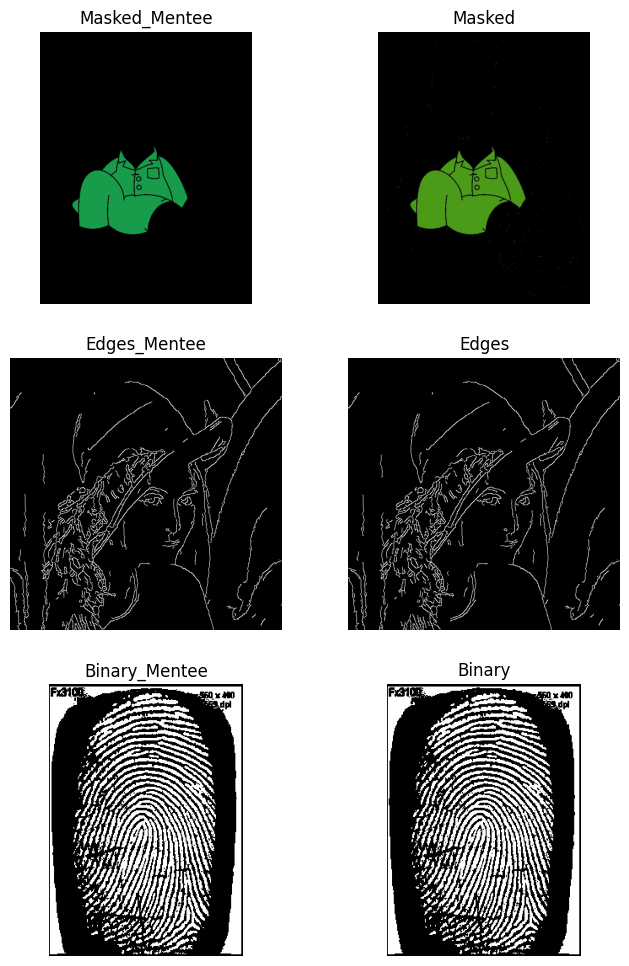

In [119]:
fig, axs1 = plt.subplots(3,2,figsize=(8,12))
axs1[0,0].imshow(cartoon_y_mentee)
axs1[0,1].imshow(cartoon_y)
axs1[0,0].axis("off")
axs1[0,1].axis("off")
axs1[0,0].set_title("Masked_Mentee")
axs1[0,1].set_title("Masked")
axs1[1,0].imshow(girl_y_mentee,cmap="gray")
axs1[1,1].imshow(girl_y)
axs1[1,0].axis("off")
axs1[1,1].axis("off")
axs1[1,0].set_title("Edges_Mentee")
axs1[1,1].set_title("Edges")
axs1[2,0].imshow(fingerprint_y_mentee,cmap="gray")
axs1[2,1].imshow(fingerprint_y)
axs1[2,0].axis("off")
axs1[2,1].axis("off")
axs1[2,0].set_title("Binary_Mentee")
axs1[2,1].set_title("Binary")
plt.show()